# 卷积 Python 图示

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.integrate as integrate
f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: (t>0) * np.exp(-2*t)

In [2]:
Fs = 50  # our sampling frequency for the plotting
T = 5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples

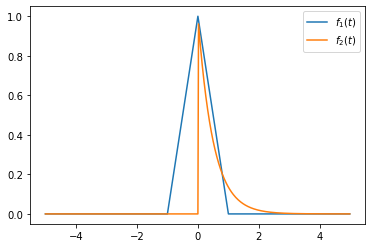

In [3]:
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.legend()

Result of the convolution (red shaded area): (f_1*f_2)(t_0=1) = 0.19


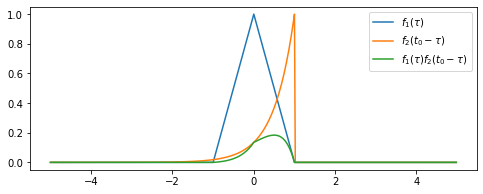

In [4]:
t0 = 1
flipped = lambda tau: f2(t0-tau)
product = lambda tau: f1(tau)*f2(t0-tau)

plt.figure(figsize=(8,3))
plt.plot(t, f1(t), label=r'$f_1(\tau)$')
plt.plot(t, flipped(t), label=r'$f_2(t_0-\tau)$')
plt.plot(t, product(t), label=r'$f_1(\tau)f_2(t_0-\tau)$')
plt.legend()
# Explicitely calculate the integral, using the Simpson integration rule
print("Result of the convolution (red shaded area): (f_1*f_2)(t_0=%.0f) = %.2f" % (t0, integrate.simps(product(t), t)))

In [5]:
import scipy
def showConvolution(f1, f2, t0):
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)
    
    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves
    
    plt.subplot(211)
    plt.plot(t, f1(t), label=r'$f_1(\tau)$')
    plt.plot(t, f_shift(t), label=r'$f_2(t_0-\tau)$')
    plt.plot(t, prod(t), 'r-', label=r'$f_1(\tau)f_2(t_0-\tau)$')
    plt.legend()
    
    # plot the convolution curve
    plt.subplot(212)
    plt.plot(t, convolution, label='$(f_1*f_2)(t)$')
    plt.legend()
    
    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    plt.plot(t0, current_value, 'ro')  # plot the point

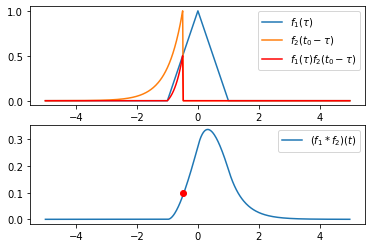

In [6]:
showConvolution(f1, f2, -0.5)

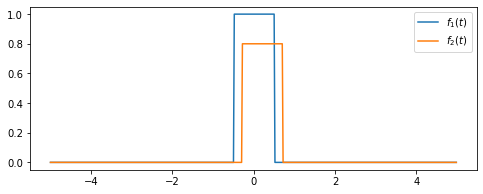

In [7]:
f1 = lambda t: (abs(t)<0.5).astype(float)
f2 = lambda t: 0.8*(abs(t-0.2)<0.5).astype(float)
plt.figure(figsize=(8,3))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.legend()

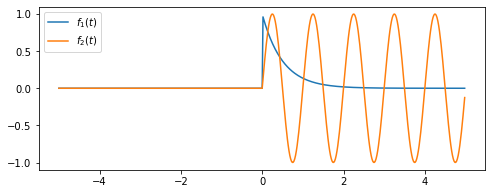

In [8]:
f1 = lambda t: (t>0) * np.exp(-2*t)
f2 = lambda t: np.sin(2*np.pi*t) * (t>0)
plt.figure(figsize=(8,3))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.legend()